# Phase 2

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading data

link:- https://www.kaggle.com/datasets/gokulrajkmv/indian-statewise-data-from-rbi

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\India_Crime -Zip\downlode file\RBI DATA states_wise_population_Income.csv")
df.head()

,States_Union Territories,2001 - LIT,2011- LIT,2001 - POP,2011- POP
0,A & N Islands,81.30,86.63,356,381
1,Andhra Pradesh,60.47,67.02,76210,84581
2,Arunachal Pradesh,54.34,65.39,1098,1384
3,Assam,63.25,72.19,26656,31206
4,Bihar,47.00,61.80,82999,104099


* link:- https://www.kaggle.com/datasets/rushikeshlavate/states-and-union-territories-of-india-by-area?resource=download
* Also edited in excel

In [3]:
df_area = pd.read_csv(r"C:\Users\HP\Downloads\List of states and union territories of India by area.csv")
df_area.head()

,States_Union Territories,Area (km2),National Share (%)
0,Rajasthan,"3,42,239",10.42
1,Madhya Pradesh,"3,08,252",9.37
2,Maharashtra,"3,07,713",9.36
3,Uttar Pradesh,"2,40,928",7.33
4,Gujarat,"1,96,024",5.96


In [4]:
df_new = pd.merge(df,df_area,on="States_Union Territories")
df_new["States_Union Territories"] = df_new["States_Union Territories"].str.lower()
df_new.head()

,States_Union Territories,2001 - LIT,2011- LIT,2001 - POP,2011- POP,Area (km2),National Share (%)
0,a & n islands,81.30,86.63,356,381,"8,249",0.25
1,andhra pradesh,60.47,67.02,76210,84581,"1,60,205",4.87
2,arunachal pradesh,54.34,65.39,1098,1384,"83,743",2.54
3,assam,63.25,72.19,26656,31206,"78,438",2.38
4,bihar,47.00,61.80,82999,104099,"94,163",2.86


### 2.1	Analysis of Literacy Rate vs Total Crimes.

In [5]:
df_crime = pd.read_excel(r"C:\Users\HP\Downloads\data_crime.xlsx")
df_crime.head()

,Row Labels,crime_2001,crime_2002,crime_2003,crime_2004,crime_2005,crime_2006,crime_2007,crime_2008,crime_2009,crime_2010,crime_2011,crime_2012
0,A & N ISLANDS,1316,1216,1288,1496,1364,1352,1614,1764,1882,1960,1586,1366
1,ANDHRA PRADESH,260178,287220,313902,317512,314246,347818,350174,358550,360882,362876,379560,385044
2,ARUNACHAL PRADESH,4684,4456,4122,4512,4608,4588,4572,4748,4724,4878,4572,4840
3,ASSAM,73754,72692,76390,81350,84012,87346,90564,106666,110626,123336,133428,155364
4,BIHAR,176864,188080,184526,216120,195700,201330,218840,245338,245862,254906,271792,293228


In [6]:
df_crime["States_Union Territories"]=df_crime["Row Labels"].str.lower()
df_crime.drop("Row Labels",axis=1,inplace=True)
df_crime.head()

,crime_2001,crime_2002,crime_2003,crime_2004,crime_2005,crime_2006,crime_2007,crime_2008,crime_2009,crime_2010,crime_2011,crime_2012,States_Union Territories
0,1316,1216,1288,1496,1364,1352,1614,1764,1882,1960,1586,1366,a & n islands
1,260178,287220,313902,317512,314246,347818,350174,358550,360882,362876,379560,385044,andhra pradesh
2,4684,4456,4122,4512,4608,4588,4572,4748,4724,4878,4572,4840,arunachal pradesh
3,73754,72692,76390,81350,84012,87346,90564,106666,110626,123336,133428,155364,assam
4,176864,188080,184526,216120,195700,201330,218840,245338,245862,254906,271792,293228,bihar


In [7]:
crime = df_crime.iloc[:,[-1,0,10]]
crime.head()

,States_Union Territories,crime_2001,crime_2011
0,a & n islands,1316,1586
1,andhra pradesh,260178,379560
2,arunachal pradesh,4684,4572
3,assam,73754,133428
4,bihar,176864,271792


In [8]:
lit = df_new.iloc[:,[0,1,2]]
lit.head()

,States_Union Territories,2001 - LIT,2011- LIT
0,a & n islands,81.30,86.63
1,andhra pradesh,60.47,67.02
2,arunachal pradesh,54.34,65.39
3,assam,63.25,72.19
4,bihar,47.00,61.80


In [9]:
final_df = pd.merge(crime,lit,on="States_Union Territories")
final_df.head()

,States_Union Territories,crime_2001,crime_2011,2001 - LIT,2011- LIT
0,a & n islands,1316,1586,81.30,86.63
1,andhra pradesh,260178,379560,60.47,67.02
2,arunachal pradesh,4684,4572,54.34,65.39
3,assam,73754,133428,63.25,72.19
4,bihar,176864,271792,47.00,61.80


<Axes: xlabel='crime_2001', ylabel='2001 - LIT'>

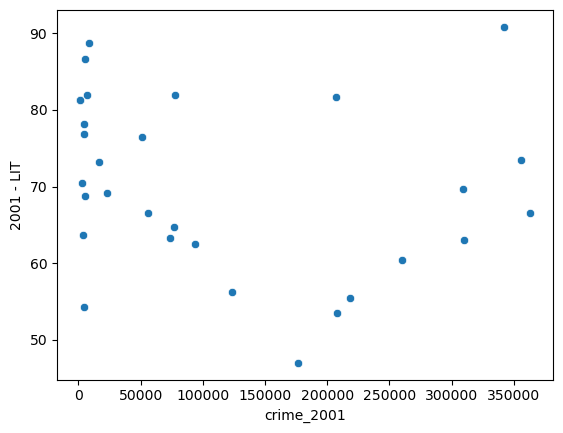

In [10]:
sns.scatterplot(data=final_df,x=final_df["crime_2001"],y=final_df["2001 - LIT"])

* The higher the literacy rate, the lower the crime rate.we can see that 90% literacy have aproximatly 0 crime rate.
* Also every year literacy rate increseing that's why crime rate is decresing
* crime is lower in 2011 in compare to 2001

<Axes: xlabel='crime_2011', ylabel='2011- LIT'>

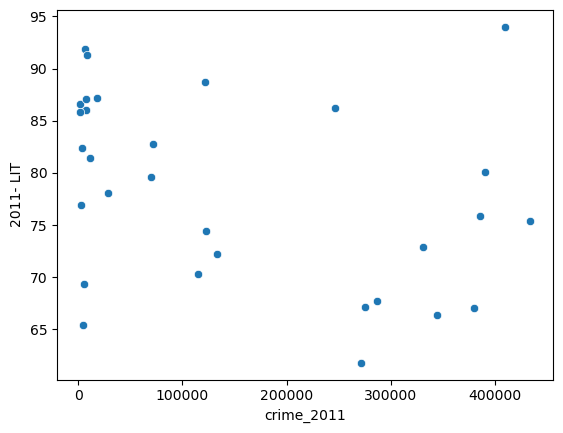

In [11]:
sns.scatterplot(data=final_df,x=final_df["crime_2011"],y=final_df["2011- LIT"])

In [12]:
final_df.loc[:,["States_Union Territories","crime_2001","2001 - LIT"]].sort_values(by="crime_2001",ascending=False).head(5)


,States_Union Territories,crime_2001,2001 - LIT
14,madhya pradesh,363482,66.60
27,uttar pradesh,356258,73.45
15,maharashtra,342466,90.86
23,rajasthan,310370,63.08
25,tamil nadu,309602,69.65


* madhya pradesh have highest crime in 2001
* uttar pradesh	have second highest crime in 2001
* maharashtra have 91% Literacy Rate but maharashtra have third highest crime in 2001 

In [13]:
final_df.loc[:,["States_Union Territories","crime_2001","2001 - LIT"]].sort_values(by="crime_2001",ascending=False).tail(5)

,States_Union Territories,crime_2001,2001 - LIT
18,mizoram,4492,76.88
17,meghalaya,3374,63.74
19,nagaland,2468,70.50
0,a & n islands,1316,81.30
24,sikkim,888,81.24


* lowest crime is happend in sikkim and Literacy Rate is also more than 80%
* second lowest crime is happend in a & n islands and Literacy Rate is also more than 80%
* second lowest crime is happend in nagaland and Literacy Rate is also more than 80%

In [14]:
final_df.loc[:,["States_Union Territories","crime_2011","2011- LIT"]].sort_values(by="crime_2011",ascending=False).head(5)

,States_Union Territories,crime_2011,2011- LIT
14,madhya pradesh,434188,75.37
15,maharashtra,409804,94.00
27,uttar pradesh,390270,80.09
25,tamil nadu,385758,75.84
1,andhra pradesh,379560,67.02


* In 2011 also madhya pradesh have highest crime also Literacy Rate is increse.
* In 2011 maharastra on 2nd position in crime but still maharashtra has 94% Literacy Rate.
* uttar pradesh have third highest crime in india and Literacy Rate is incrising by 7% from last 10 years

## 2.2	Analysis of the type of crime vs each state vs Literacy rate

In [15]:
df_crime_2001 = pd.read_excel(r"C:\Users\HP\Downloads\2001 crime.xlsx")
df_crime_2001.head()

,STATE/UT,MURDER,ATTEMPTTOMURDER,CULPABLEHOMICIDENOTAMOUNTINGTOMURDER,RAPE,CUSTODIALRAPE,OTHERRAPE,KIDNAPPING&ABDUCTION,KIDNAPPINGANDABDUCTIONOFWOMENANDGIRLS,KIDNAPPINGANDABDUCTIONOFOTHERS,...,CHEATING,COUNTERFIETING,CRIMINALBREACHOFTRUST,RIOTS,OTHERTHEFT,AUTOTHEFT,THEFT,BURGLARY,ROBBERY,OTHERIPCCRIMES
0,A&NISLANDS,26,0,0,6,0,6,4,4,0,...,16,4,20,26,122,8,130,128,8,646
1,ANDHRAPRADESH,5204,3110,272,1742,0,1742,2364,1530,834,...,10782,288,1576,6002,27400,6102,33502,14440,1258,68688
2,ARUNACHALPRADESH,166,106,6,66,0,66,166,110,56,...,60,8,82,48,814,72,886,496,168,1236
3,ASSAM,2712,962,80,1634,0,1634,2960,2140,820,...,1150,92,748,5906,10034,700,10734,4846,1374,18630
4,BIHAR,7286,6838,500,1776,0,1776,4318,1036,3282,...,3318,170,1892,17212,17302,2100,19402,6466,4406,73334


In [16]:
df_crime_2011 = pd.read_excel(r"C:\Users\HP\Downloads\2011 crime.xlsx")
df_crime_2011.head()

,STATE/UT,MURDER,ATTEMPTTOMURDER,CULPABLEHOMICIDENOTAMOUNTINGTOMURDER,RAPE,CUSTODIALRAPE,OTHERRAPE,KIDNAPPING&ABDUCTION,KIDNAPPINGANDABDUCTIONOFWOMENANDGIRLS,KIDNAPPINGANDABDUCTIONOFOTHERS,...,CHEATING,COUNTERFIETING,CRIMINALBREACHOFTRUST,RIOTS,OTHERTHEFT,AUTOTHEFT,THEFT,BURGLARY,ROBBERY,OTHERIPCCRIMES
0,A&NISLANDS,28,12,4,26,0,26,30,24,6,...,64,0,6,22,168,8,176,198,2,784
1,ANDHRAPRADESH,5616,4458,342,2884,0,2884,4308,3224,1084,...,19496,448,2348,4420,38602,17932,56534,16600,1200,76784
2,ARUNACHALPRADESH,130,58,4,84,0,84,186,120,66,...,148,4,108,98,524,304,828,366,128,1244
3,ASSAM,2606,1008,96,3400,0,3400,7528,6384,1144,...,2990,120,1840,4656,15448,1170,16618,6654,1674,51026
4,BIHAR,6396,6654,696,1868,2,1866,8536,6100,2436,...,7552,128,3482,19536,22502,10082,32584,7258,2762,111410


In [17]:
state_lit = final_df.loc[:,["States_Union Territories","2001 - LIT"]]
state_lit.head()

,States_Union Territories,2001 - LIT
0,a & n islands,81.30
1,andhra pradesh,60.47
2,arunachal pradesh,54.34
3,assam,63.25
4,bihar,47.00


In [18]:
(state_lit.sort_values(by="2001 - LIT",ascending=False).head(5))

,States_Union Territories,2001 - LIT
15,maharashtra,90.86
21,puducherry,88.80
16,manipur,86.66
9,haryana,82.01
5,chandigarh,81.94


* maharashtra have 90.86% Literacy Rate 

In [19]:
(state_lit.sort_values(by="2001 - LIT").head(5))

,States_Union Territories,2001 - LIT
4,bihar,47.00
13,kerala,53.56
2,arunachal pradesh,54.34
12,karnataka,55.52
29,west bengal,56.27


* bihar have lowest(47%) Literacy Rate

In [20]:
state_lit = final_df.loc[:,["States_Union Territories","2011- LIT"]]

In [21]:
(state_lit.sort_values(by="2011- LIT",ascending=False).head(5))

,States_Union Territories,2011- LIT
15,maharashtra,94.00
16,manipur,91.85
21,puducherry,91.33
9,haryana,88.70
28,uttarakhand,87.22


* In 2011 also maharastra have highest(94%) Literacy Rate

In [22]:
(state_lit.sort_values(by="2011- LIT",ascending=True).head(5))

,States_Union Territories,2011- LIT
4,bihar,61.80
2,arunachal pradesh,65.39
13,kerala,66.41
1,andhra pradesh,67.02
12,karnataka,67.16


* In 2011 also bihar have lowest(61.8%) Literacy Rate

In [23]:
murder = df_crime_2001.loc[:,["STATE/UT","MURDER"]]
murder["MURDER_Rate"] = murder["MURDER"] /sum(murder["MURDER"]) *100
murder.sort_values(by="MURDER",ascending=False).head()

,STATE/UT,MURDER,MURDER_Rate
32,UTTARPRADESH,15202,20.996078
4,BIHAR,7286,10.062980
20,MAHARASHTRA,5678,7.842108
1,ANDHRAPRADESH,5204,7.187448
19,MADHYAPRADESH,4850,6.698525


* In 2001, UTTAR PRADESH have 15202 murder case which is 21% of entired data
* BIHAR has 10% murder case in 2001

In [24]:
murder = df_crime_2011.loc[:,["STATE/UT","MURDER"]]
murder["MURDER_Rate"] = murder["MURDER"] /sum(murder["MURDER"]) *100
murder.sort_values(by="MURDER",ascending=False).head()

,STATE/UT,MURDER,MURDER_Rate
32,UTTARPRADESH,9902,14.432298
4,BIHAR,6396,9.322256
20,MAHARASHTRA,5636,8.214546
1,ANDHRAPRADESH,5616,8.185396
19,MADHYAPRADESH,5022,7.319633


* In 2011, UTTAR PRADESH have 9902 murder case which is 14% of entired data we can see that murder case is reduse in 2011 
* BIHAR has 9% murder case in 2011 also decrese from 2001

In [25]:
ATTEMPT_TO_MURDER = df_crime_2001.loc[:,["STATE/UT","ATTEMPTTOMURDER"]]
ATTEMPT_TO_MURDER["ATTEMPTTOMURDER_rate"] = ATTEMPT_TO_MURDER["ATTEMPTTOMURDER"] /sum(ATTEMPT_TO_MURDER["ATTEMPTTOMURDER"]) *100
ATTEMPT_TO_MURDER.sort_values(by="ATTEMPTTOMURDER",ascending=False).head()

,STATE/UT,ATTEMPTTOMURDER,ATTEMPTTOMURDER_rate
32,UTTARPRADESH,15928,25.264093
4,BIHAR,6838,10.846049
19,MADHYAPRADESH,5740,9.104463
30,TAMILNADU,4408,6.991720
28,RAJASTHAN,3846,6.100308


* In 2001 UTTARPRADESH have 25% ATTEMPTTOMURDER case which is so many high
* In 2001 BIHAR	have 10% ATTEMPTTOMURDER case which is so many second high

In [26]:
ATTEMPT_TO_MURDER = df_crime_2011.loc[:,["STATE/UT","ATTEMPTTOMURDER"]]
ATTEMPT_TO_MURDER["ATTEMPTTOMURDER_rate"] = ATTEMPT_TO_MURDER["ATTEMPTTOMURDER"] /sum(ATTEMPT_TO_MURDER["ATTEMPTTOMURDER"]) *100
ATTEMPT_TO_MURDER.sort_values(by="ATTEMPTTOMURDER",ascending=False).head()

,STATE/UT,ATTEMPTTOMURDER,ATTEMPTTOMURDER_rate
32,UTTARPRADESH,9306,14.825554
4,BIHAR,6654,10.600605
30,TAMILNADU,5924,9.437629
19,MADHYAPRADESH,4680,7.455791
34,WESTBENGAL,4484,7.143540


* In 2011 UTTARPRADESH have 15% ATTEMPTTOMURDER case which is so many high also decrese from 2001 becuse of incresing Literacy Rate
* In 2011 BIHAR	have 10% ATTEMPTTOMURDER case which is so many second high 

**Similarly we can do more analysis**

## 2.3	Analysis of year-on-year total crime rate.

In [27]:
dataset = pd.read_csv(r"C:\Users\HP\Downloads\India_Crime -Zip\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
dataset.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [28]:
total_crime = dataset.iloc[:,[0,2,-1]]
total_crime.head()

,STATE/UT,YEAR,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507


<Axes: xlabel='YEAR'>

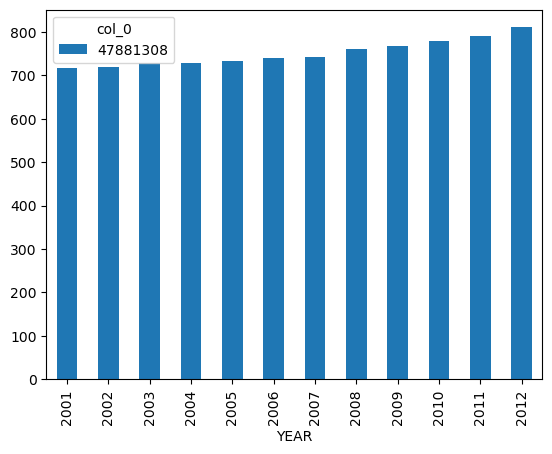

In [29]:
value=pd.crosstab(total_crime["YEAR"],total_crime["TOTAL IPC CRIMES"].sum())
value.plot.bar()

#### We can see that year on year number of crime is increase

## 2.4	Analysis of area vs overall crime.

In [30]:
df_area["States_Union Territories"] = df_area["States_Union Territories"].str.lower()
df_area.head()

,States_Union Territories,Area (km2),National Share (%)
0,rajasthan,"3,42,239",10.42
1,madhya pradesh,"3,08,252",9.37
2,maharashtra,"3,07,713",9.36
3,uttar pradesh,"2,40,928",7.33
4,gujarat,"1,96,024",5.96


In [31]:
total_crime["States_Union Territories"] = total_crime["STATE/UT"].str.lower()
total_crime.head()

,STATE/UT,YEAR,TOTAL IPC CRIMES,States_Union Territories
0,ANDHRA PRADESH,2001,4154,andhra pradesh
1,ANDHRA PRADESH,2001,4125,andhra pradesh
2,ANDHRA PRADESH,2001,5818,andhra pradesh
3,ANDHRA PRADESH,2001,3140,andhra pradesh
4,ANDHRA PRADESH,2001,6507,andhra pradesh


In [32]:
area_vs_crime = pd.DataFrame()

In [33]:
total_ipc_crimes_by_state = total_crime.groupby('States_Union Territories')['TOTAL IPC CRIMES'].sum()
total_crime = pd.DataFrame(total_ipc_crimes_by_state)

In [34]:
new_df = pd.merge(total_crime,df_area,on="States_Union Territories")
(new_df.sort_values(by="TOTAL IPC CRIMES",ascending=False))

,States_Union Territories,TOTAL IPC CRIMES,Area (km2),National Share (%)
17,madhya pradesh,4827540,"3,08,252",9.370
18,maharashtra,4546872,"3,07,713",9.360
28,tamil nadu,4120352,"1,30,058",3.950
1,andhra pradesh,4037962,"1,60,205",4.870
30,uttar pradesh,3716148,"2,40,928",7.330
26,rajasthan,3711832,"3,42,239",10.420
14,karnataka,2962126,"1,91,791",5.830
15,kerala,2874918,"38,863",1.180
10,gujarat,2771550,"1,96,024",5.960
4,bihar,2692586,"94,163",2.860


* madhya pradesh have 4827540 number of crime and 9.37% area of india
* rajasthan	have more than 10% area of india and number of case is 3711832

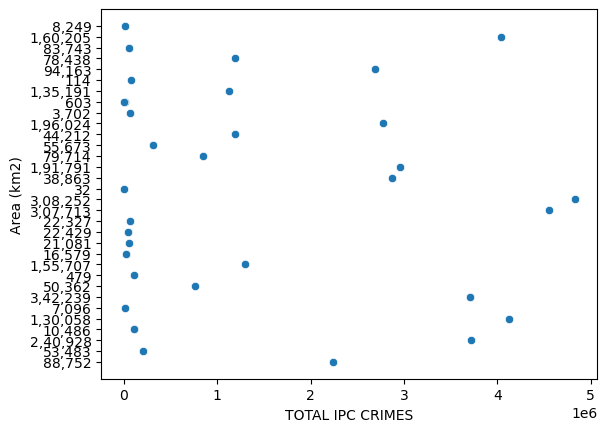

In [35]:
sns.scatterplot(data=new_df,x="TOTAL IPC CRIMES",y="Area (km2)")
plt.show()

<Axes: >

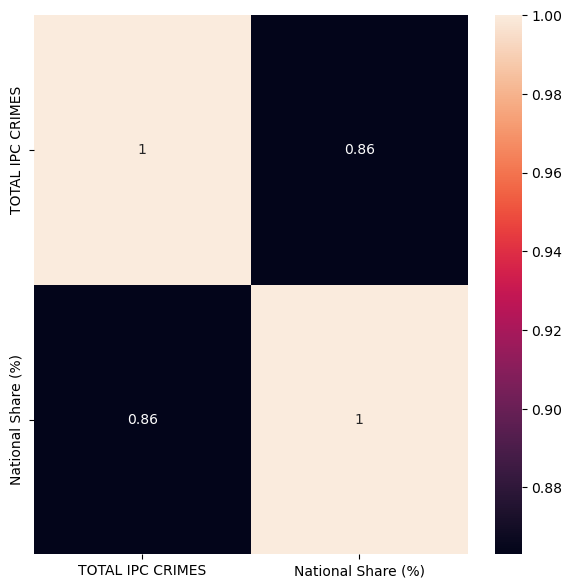

In [36]:
plt.figure(figsize=(7,7))
sns.heatmap(new_df.corr(),annot=True)

* we can see that there is 86% correletion between TOTAL IPC CRIMES and National Share

##   2.5	Analysis of Population vs overall Crime.

In [37]:
df["States_Union Territories"] = df["States_Union Territories"].str.lower()
df.head()

,States_Union Territories,2001 - LIT,2011- LIT,2001 - POP,2011- POP
0,a & n islands,81.30,86.63,356,381
1,andhra pradesh,60.47,67.02,76210,84581
2,arunachal pradesh,54.34,65.39,1098,1384
3,assam,63.25,72.19,26656,31206
4,bihar,47.00,61.80,82999,104099


In [38]:
df_crime.head()

,crime_2001,crime_2002,crime_2003,crime_2004,crime_2005,crime_2006,crime_2007,crime_2008,crime_2009,crime_2010,crime_2011,crime_2012,States_Union Territories
0,1316,1216,1288,1496,1364,1352,1614,1764,1882,1960,1586,1366,a & n islands
1,260178,287220,313902,317512,314246,347818,350174,358550,360882,362876,379560,385044,andhra pradesh
2,4684,4456,4122,4512,4608,4588,4572,4748,4724,4878,4572,4840,arunachal pradesh
3,73754,72692,76390,81350,84012,87346,90564,106666,110626,123336,133428,155364,assam
4,176864,188080,184526,216120,195700,201330,218840,245338,245862,254906,271792,293228,bihar


In [39]:
population_crime=pd.merge(df,df_crime,on="States_Union Territories")
population_crime.head()

,States_Union Territories,2001 - LIT,2011- LIT,2001 - POP,2011- POP,crime_2001,crime_2002,crime_2003,crime_2004,crime_2005,crime_2006,crime_2007,crime_2008,crime_2009,crime_2010,crime_2011,crime_2012
0,a & n islands,81.30,86.63,356,381,1316,1216,1288,1496,1364,1352,1614,1764,1882,1960,1586,1366
1,andhra pradesh,60.47,67.02,76210,84581,260178,287220,313902,317512,314246,347818,350174,358550,360882,362876,379560,385044
2,arunachal pradesh,54.34,65.39,1098,1384,4684,4456,4122,4512,4608,4588,4572,4748,4724,4878,4572,4840
3,assam,63.25,72.19,26656,31206,73754,72692,76390,81350,84012,87346,90564,106666,110626,123336,133428,155364
4,bihar,47.00,61.80,82999,104099,176864,188080,184526,216120,195700,201330,218840,245338,245862,254906,271792,293228


In [40]:
pop_crime = population_crime.iloc[:,[0,3,4,5,-2]]
pop_crime.head()

,States_Union Territories,2001 - POP,2011- POP,crime_2001,crime_2011
0,a & n islands,356,381,1316,1586
1,andhra pradesh,76210,84581,260178,379560
2,arunachal pradesh,1098,1384,4684,4572
3,assam,26656,31206,73754,133428
4,bihar,82999,104099,176864,271792


<Axes: xlabel='2001 - POP', ylabel='crime_2001'>

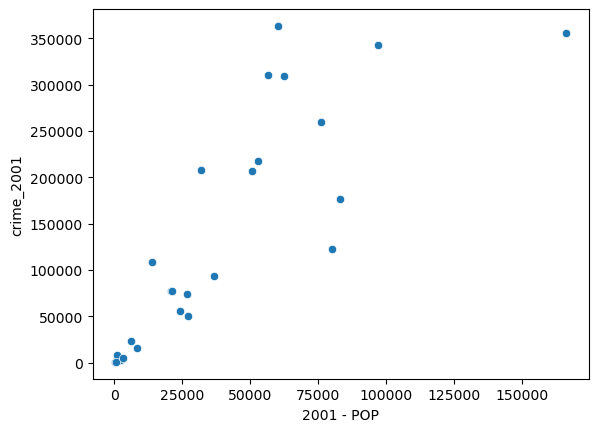

In [41]:
sns.scatterplot(data=pop_crime,x="2001 - POP",y="crime_2001")

* we can see that when population is incresing then crime is also incresing in 2001

<Axes: xlabel='2011- POP', ylabel='crime_2011'>

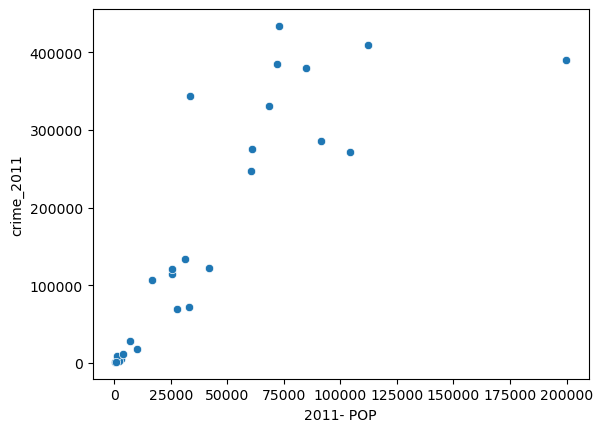

In [42]:
sns.scatterplot(data=pop_crime,x="2011- POP",y="crime_2011")

* In 2011 also population incresing then crime is also incresing

<Axes: >

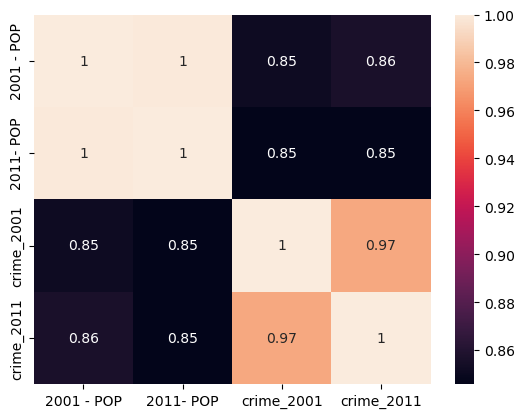

In [43]:
sns.heatmap(pop_crime.corr(),annot=True)

heare also columns have strong correletion

##   2.6	Each state crime report.

In [44]:
total_crime.sort_values(by="TOTAL IPC CRIMES",ascending=False)

,TOTAL IPC CRIMES
States_Union Territories,
madhya pradesh,4827540
maharashtra,4546872
tamil nadu,4120352
andhra pradesh,4037962
uttar pradesh,3716148
rajasthan,3711832
karnataka,2962126
kerala,2874918
gujarat,2771550


* we can see that madhya pradesh have highest number of crime in india
* maharashtra have more than 4500000 wich is second high in india
* tamil nadu ,andhra pradesh have more tha 4500000 total case wichi is lot.
* d & n haveli ,daman & diu,sikkim	 and lakshadweep have less then 15000 case which is lowest baecuse in this place have low population
* uttar pradesh and rajasthan have more than 3500000 crime case
* karnataka,kerala,gujarat,bihar,west bengal,odisha,delhi ut,assam,haryana and chhattisgarh	have case between 1000000 to 3000000
* jharkhand,punjab,jammu & kashmir,himachal pradesh,uttarakhand,puducherry and tripura have case between 100000 to 840000
* And other state have case between 10000 to 900000 